# Studio Projektowe

Instalacja dodatkowego pakietu nie zawartego domyślnie w pakietach Anacondy

In [166]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)

  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\test\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\test\\AppData\\Local\\Temp\\pip-install-vi3ufv4k\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\test\\AppData\\Local\\Temp\\pip-install-vi3ufv4k\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\test\AppData\Local\Temp\pip-wheel-bgtj0i5m'
       cwd: C:\Users\test\AppData\Local\Temp\pip-install-vi3ufv4k\fbprophet\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Importing plotly failed. Interactive plots will not work.
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efcc0cf9

## Pobranie danych z API NBP

In [65]:
import requests
import pandas as pd
import numpy as np
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import fbprophet


def loadData():
    col_names = ['date', 'price']
    tmp_data = []
    for i in range(2013, 2020):
        tmp_df = pd.DataFrame(columns=col_names)
        response = requests.get(f'http://api.nbp.pl/api/cenyzlota/{i}-01-01/{i}-12-31?format=json')
        response = response.json()
        response = pd.DataFrame(response)
        tmp_df['date'] = response['data']
        tmp_df['price'] = response['cena']
        tmp_data.append(tmp_df)
    data = pd.concat(tmp_data, ignore_index=True)
    
    today = datetime.date.today()
    tmp_df = pd.DataFrame(columns=col_names)
    response = requests.get(f'http://api.nbp.pl/api/cenyzlota/2020-01-01/{today}?format=json')
    response = response.json()
    response = pd.DataFrame(response)
    tmp_df['date'] = response['data']
    tmp_df['price'] = response['cena']
    data = pd.concat([data, tmp_df], ignore_index=True)
    return data

def saveDataToFile(data):
    data.to_csv('data.csv', index=False)



In [36]:
data = loadData()
saveDataToFile(data)

## Przetwarzanie danych

In [37]:
def addTimeColumns(data):
    data['date'] = data['date'].astype('datetime64')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['weekday'] = data['date'].dt.weekday
    return data

data = addTimeColumns(data)

years = [data[data.year == i] for i in range(2013, 2021)]

months = [[years[i][data.month == j] for j in range(1,13)] for i in range(8)]


C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\test\Anaconda3\lib\

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1995 non-null   datetime64[ns]
 1   price    1995 non-null   float64       
 2   year     1995 non-null   int64         
 3   month    1995 non-null   int64         
 4   day      1995 non-null   int64         
 5   weekday  1995 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 93.6 KB


## Podział danych na zbiory treningowe i testowe

In [39]:
data = data.set_index('date')

In [40]:
data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-30'],
              dtype='datetime64[ns]', name='date', length=1995, freq=None)

In [101]:
df = data[['price']]

In [102]:
df

price
date              
2013-01-02  165.83
2013-01-03  166.97
2013-01-04  167.43
2013-01-07  167.98
2013-01-08  167.26
...            ...
2020-11-24  222.54
2020-11-25  217.70
2020-11-26  218.58
2020-11-27  218.41
2020-11-30  215.19

[1995 rows x 1 columns]

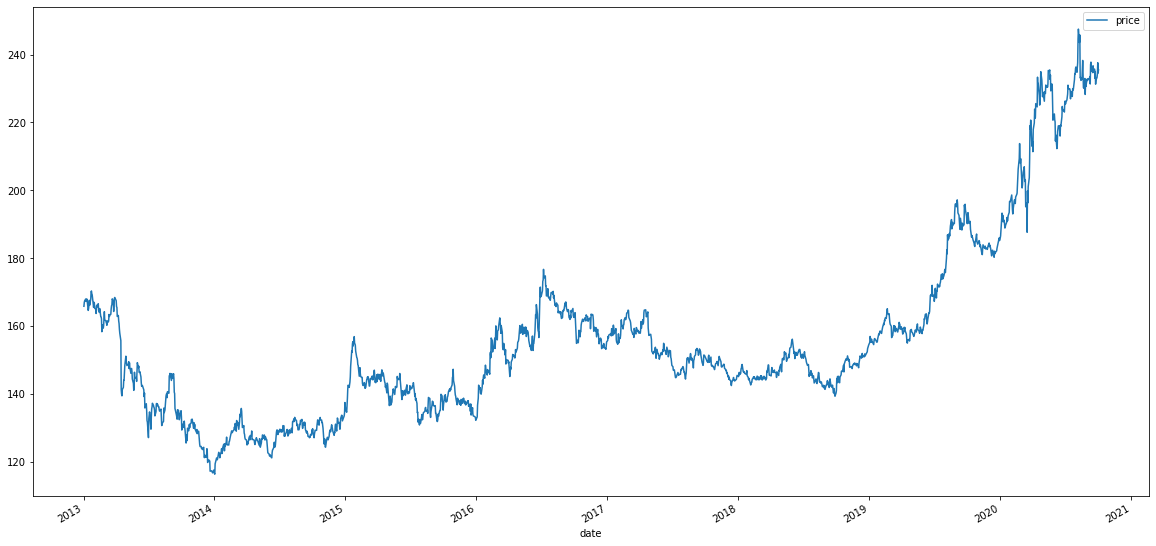

In [67]:
df.plot(figsize=(20,10))
plt.show()

In [8]:


# # a variable for predicting 30 days out into the future
# forecast_out = 30

# df['Prediction'] = df[['price']].shift(-forecast_out)
# data.tail(40)

# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

# Remove the last '30' rows
X = X[:-forecast_out]

# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])

# Get all of the y values except the last '30' rows
y = y[:-forecast_out]

# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.015 )

x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
y_train = df[:-40:]

In [46]:
y_test = df[-40:]

In [51]:
y_test['price'] = np.NaN

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ARIMA

In [43]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [61]:
min_res = np.Inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if(results.aic < min_res):
                min_res = results.aic
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print(min_res)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:25332.132733922415
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22588.263457647707
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12098.575422752878
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12025.051481567334
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12093.174063550408
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12075.34968801841
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12030.928808937108
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12027.044409332351
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:22640.923188821514
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19948.986217757287
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10509.110662453033
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:10394.845141306145
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10512.612608197665
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:10437.372174672084
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10411.44628299283
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10396.746244814833
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7555.332986395143
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7515.846831838

optymalny model: (1, 1, 1)x(0, 1, 1, 12)

In [103]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3753      0.159     -2.363      0.018      -0.687      -0.064
ma.L1          0.2826      0.166      1.698      0.090      -0.044       0.609
ma.S.L12      -0.9849      0.006   -152.277      0.000      -0.998      -0.972
sigma2         2.8968      0.040     72.072      0.000       2.818       2.976


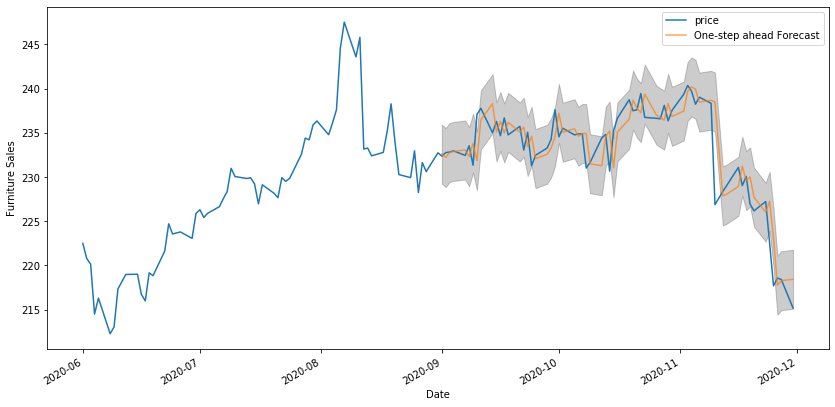

In [119]:
pred = results.get_prediction(start=pd.to_datetime('2020-09-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2020-06':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [126]:
df_reseted = df.reset_index()

In [132]:
df_reseted

date   price
0    2013-01-02  165.83
1    2013-01-03  166.97
2    2013-01-04  167.43
3    2013-01-07  167.98
4    2013-01-08  167.26
...         ...     ...
1990 2020-11-24  222.54
1991 2020-11-25  217.70
1992 2020-11-26  218.58
1993 2020-11-27  218.41
1994 2020-11-30  215.19

[1995 rows x 2 columns]

In [142]:
pred_fut = results.get_forecast(10)

In [143]:
pred_fut.predicted_mean

1995    215.616005
1996    215.379165
1997    215.749114
1998    216.010632
1999    216.066423
2000    216.484648
2001    216.341662
2002    216.410821
2003    216.444085
2004    216.206846
dtype: float64

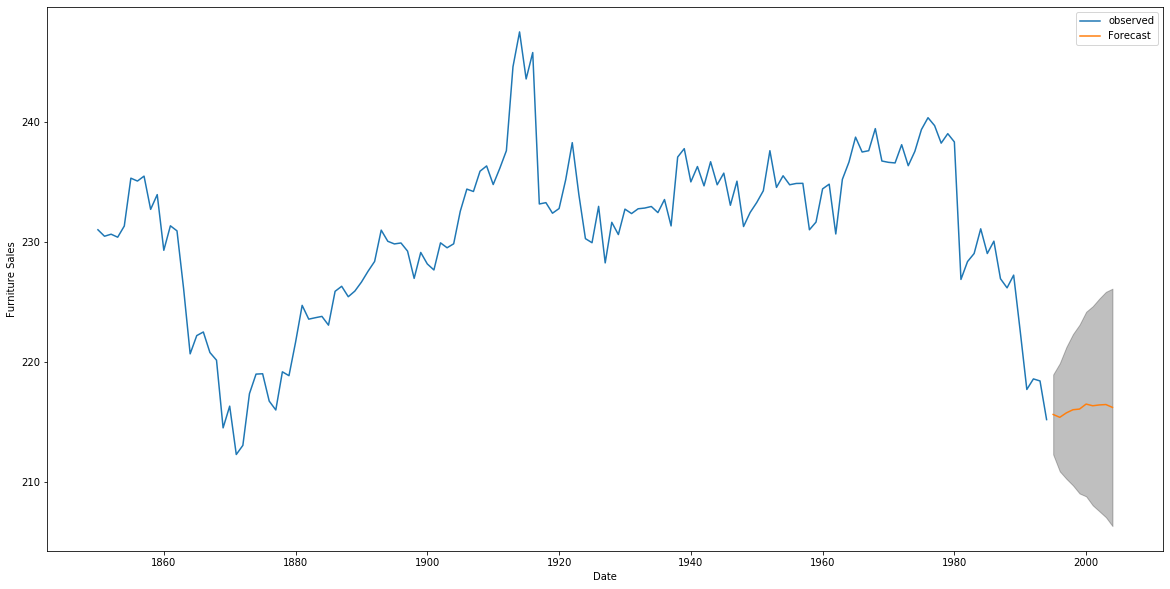

In [145]:
pred_ci = pred_fut.conf_int()
ax = df_reseted[1850:]['price'].plot(label='observed', figsize=(20, 10))
pred_fut.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [99]:
df

price
date              
2013-01-02  165.83
2013-01-03  166.97
2013-01-04  167.43
2013-01-07  167.98
2013-01-08  167.26
...            ...
2020-11-24     NaN
2020-11-25     NaN
2020-11-26     NaN
2020-11-27     NaN
2020-11-30     NaN

[1995 rows x 1 columns]

In [159]:
y_predicted = pred.predicted_mean
y_true = df['2020-09':]['price']

In [160]:
mse = ((y_predicted - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6.52


In [161]:
y_predicted_2 = y_predicted > y_predicted.shift(1)

In [162]:
y_predicted_2

date
2020-09-01    False
2020-09-02    False
2020-09-03     True
2020-09-04     True
2020-09-07     True
              ...  
2020-11-24     True
2020-11-25    False
2020-11-26    False
2020-11-27     True
2020-11-30     True
Length: 64, dtype: bool

In [163]:
y_2 = y_true > y_true.shift(1)

In [164]:
y_2

date
2020-09-01    False
2020-09-02     True
2020-09-03     True
2020-09-04     True
2020-09-07    False
              ...  
2020-11-24    False
2020-11-25    False
2020-11-26     True
2020-11-27    False
2020-11-30    False
Name: price, Length: 64, dtype: bool

In [165]:
sum(y_2 == y_predicted_2)/len(y_2)

0.34375

## SVM

In [128]:
# Support Vector Machine (Regression)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

svm_confidence = svr_rbf.score(x_test, y_test)
print("SVM Confidence: ", svm_confidence) # the best possible score is 1.0

svm_prediction = svr_rbf.predict(x_forecast)

# SVM Prediction output
print("SVM Prediction Output")
print(svm_prediction)

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_confidence = lr.score(x_test, y_test)
print("LR Confidence: ", lr_confidence)

lr_prediction = lr.predict(x_forecast)

# Linear Regression Prediction Output
print("Linear Regression Prediction Output")
print(lr_prediction)



SVM Confidence:  0.7665077731242967
SVM Prediction Output
[238.31742804 232.11439281 238.03026627 237.60745212 230.54774656
 238.56665038 238.25326465 238.07939137 235.12711981 237.05483451
 237.84632717 230.61992764 230.63847872 230.44908921 234.43466221
 231.20880995 233.91562185 232.05780179 230.99710533 228.99474778
 226.67616272 228.99474778 226.11046701 232.12728167 231.11823646
 232.35921643 234.59194395 230.37819914 231.84387412 231.45646125]
LR Confidence:  0.7089271171246532
Linear Regression Prediction Output
[238.92833756 241.04097062 239.7815163  239.89324208 241.76210979
 239.01974957 238.90802378 238.85723933 240.40108657 238.62363087
 239.83230074 241.68085467 242.68638675 242.01603203 240.53312613
 241.33552042 240.63469503 228.99489943 230.508276   231.18878761
 233.28110689 231.18878761 232.23494725 229.05584077 228.28391715
 229.36054746 224.59696619 219.68103158 220.57483787 220.40217075]


In [98]:
#Prophet
model = fbprophet.Prophet()
df_prophet = df.reset_index().drop('Prediction', axis=1)
try:
    df_prophet = df_prophet.rename(columns={"date": "ds", "price": "y"})
    df_prophet.drop(df_prophet.tail(30).index, inplace=True)
except: 
    pass


In [99]:
model.fit(df_prophet) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
future = model.make_future_dataframe(30)
df_no_weekdays = df_prophet[df_prophet['ds'].dt.dayofweek < 5]
future = future[future['ds'].dt.dayofweek < 5]
forecast = model.predict(future) 

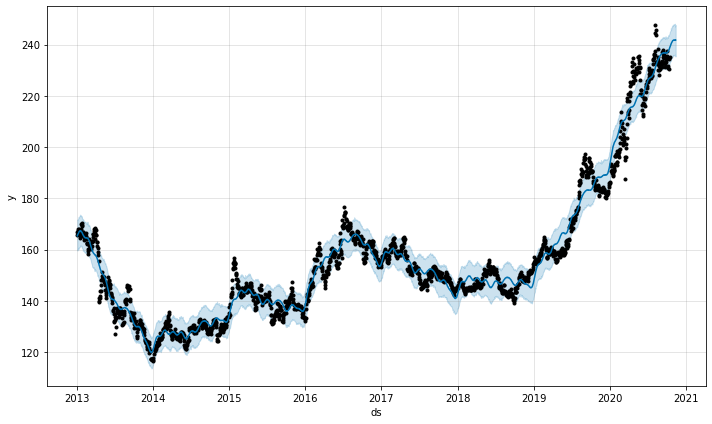

In [101]:
fig = model.plot(forecast)

In [102]:
prophet_pred = forecast[['ds', 'yhat']].tail(30)

In [103]:
prophet_pred

ds        yhat
1955 2020-10-05  236.972378
1956 2020-10-06  237.092025
1957 2020-10-07  237.246931
1958 2020-10-08  237.333950
1959 2020-10-09  237.578139
1960 2020-10-12  237.995977
1961 2020-10-13  238.217313
1962 2020-10-14  238.468004
1963 2020-10-15  238.643060
1964 2020-10-16  238.965808
1965 2020-10-19  239.547570
1966 2020-10-20  239.795745
1967 2020-10-21  240.058075
1968 2020-10-22  240.229227
1969 2020-10-23  240.532494
1970 2020-10-26  240.966746
1971 2020-10-27  241.139051
1972 2020-10-28  241.314355
1973 2020-10-29  241.389012
1974 2020-10-30  241.588190
1975 2020-11-02  241.685416
1976 2020-11-03  241.744388
1977 2020-11-04  241.809483
1978 2020-11-05  241.779110
1979 2020-11-06  241.880348
1980 2020-11-09  241.742264
1981 2020-11-10  241.746323
1982 2020-11-11  241.769525
1983 2020-11-12  241.710544
1984 2020-11-13  241.796385

## Wizualizacja

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cena złota na przestrzeni lat')

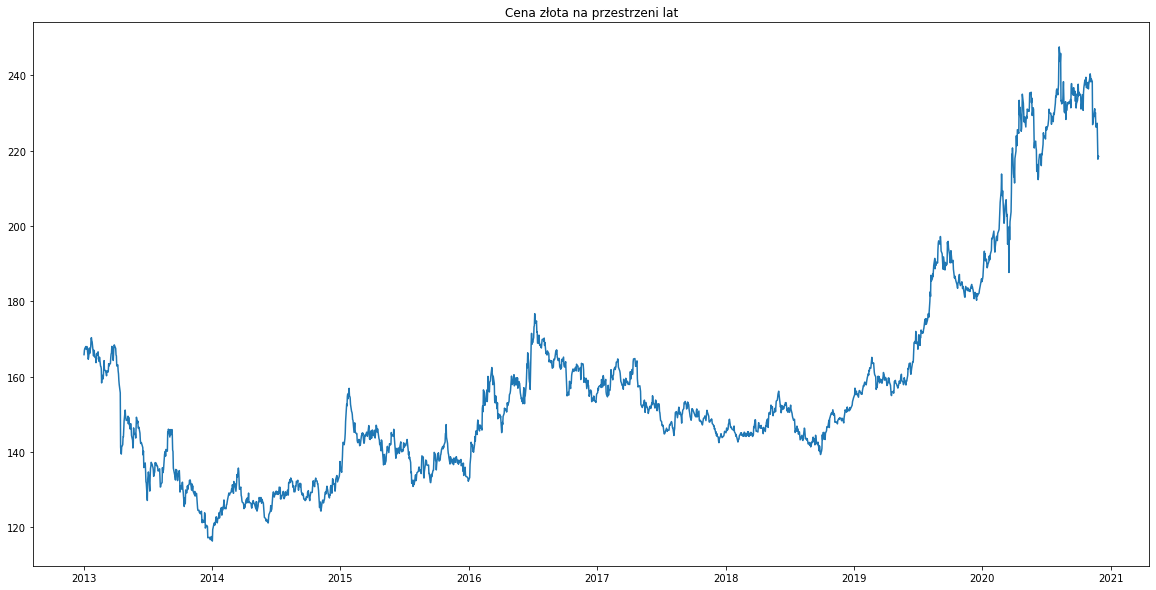

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['price'])
plt.title("Cena złota na przestrzeni lat")

In [45]:
df.index.values

array(['2013-01-02T00:00:00.000000000', '2013-01-03T00:00:00.000000000',
       '2013-01-04T00:00:00.000000000', ...,
       '2020-11-25T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-11-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
df_test = df.iloc[-30:]

In [117]:
df_test['Prediction_SVM'] = svm_prediction
df_test['Prediction_LR'] = lr_prediction

<ipython-input-117-cb9310cb8d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction_SVM'] = svm_prediction
<ipython-input-117-cb9310cb8d45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction_LR'] = lr_prediction


In [118]:
df_test['real'] = df.price > df.price.shift(1)

<ipython-input-118-3435cb180ff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['real'] = df.price > df.price.shift(1)


In [122]:
df_test['predicted_svm'] = df_test.Prediction_SVM > df_test.Prediction_SVM.shift(1)
df_test['predicted_lr'] = df_test.Prediction_LR > df_test.Prediction_LR.shift(1)

<ipython-input-122-ce5de8a31737>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_svm'] = df_test.Prediction_SVM > df_test.Prediction_SVM.shift(1)
<ipython-input-122-ce5de8a31737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_lr'] = df_test.Prediction_LR > df_test.Prediction_LR.shift(1)


Text(0.5, 1.0, 'SVM')

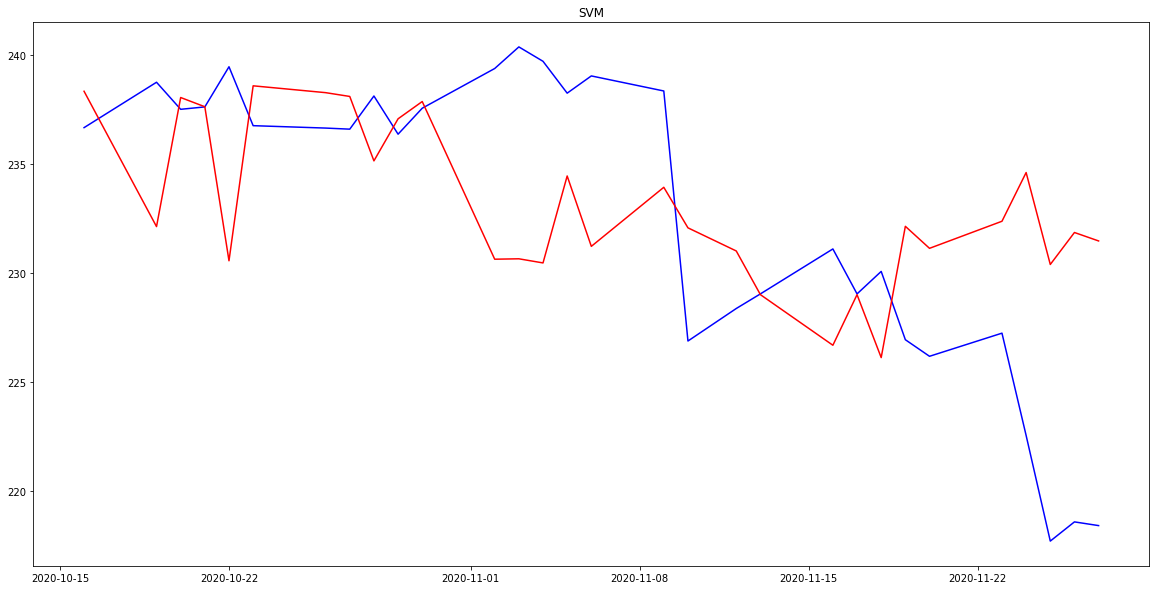

In [123]:
plt.figure(figsize=(20,10))
plt.plot(df_test.index, df_test['price'], 'b')
plt.plot(df_test.index, df_test['Prediction_SVM'], 'r')
plt.title("SVM")

In [126]:
sum(df_test['real'] == df_test['predicted_svm'])/len(df_test)

0.36666666666666664

In [127]:
df_test

price  Prediction   real  predicted  Prediction_SVM  \
date                                                               
2020-10-16  236.65  238.381684   True       True      238.317428   
2020-10-19  238.73  233.399728   True      False      232.114393   
2020-10-20  237.49  238.022264  False       True      238.030266   
2020-10-21  237.60  237.593799   True      False      237.607452   
2020-10-22  239.44  234.954736   True      False      230.547747   
2020-10-23  236.74  238.635470  False       True      238.566650   
2020-10-26  236.63  238.315883  False      False      238.253265   
2020-10-27  236.58  238.136931  False      False      238.079391   
2020-10-28  238.10  235.283191   True      False      235.127120   
2020-10-29  236.35  237.071961  False       True      237.054835   
2020-10-30  237.54  237.834683   True       True      237.846327   
2020-11-02  239.36  234.573530   True      False      230.619928   
2020-11-03  240.35  241.323172   True       True      230.638479   
2020-11-04  239.69  236.414184  False      False      230.449089   
2020-11-05  238.23  234.719543  False      False      234.434662   
2020-11-06  239.02  233.517424   True      False      231.208810   
2020-11-09  238.33  234.332274  False       True      233.915622   
2020-11-10  226.87  231.780056  False      False      232.057802   
2020-11-12  228.36  231.859515   True       True      230.997105   
2020-11-13  229.03  230.720936   True      False      228.994748   
2020-11-16  231.09  226.966899   True      False      226.676163   
2020-11-17  229.03  230.720936  False       True      228.994748   
2020-11-18  230.06  227.823040   True      False      226.110467   
2020-11-19  226.93  231.843338  False       True      232.127282   
2020-11-20  226.17  231.098886  False      False      231.118236   
2020-11-23  227.23  232.106583   True       True      232.359216   
2020-11-24  222.54  234.512133  False       True      234.591944   
2020-11-25  217.70  230.377216  False      False      230.378199   
2020-11-26  218.58  231.843198   True       True      231.843874   
2020-11-27  218.41  231.455968  False      False      231.456461   

            Prediction_LR  predicted_svm  predicted_lr  
date                                                    
2020-10-16     238.928338          False         False  
2020-10-19     241.040971          False          True  
2020-10-20     239.781516           True         False  
2020-10-21     239.893242          False          True  
2020-10-22     241.762110          False          True  
2020-10-23     239.019750           True         False  
2020-10-26     238.908024          False         False  
2020-10-27     238.857239          False         False  
2020-10-28     240.401087          False          True  
2020-10-29     238.623631           True         False  
2020-10-30     239.832301           True          True  
2020-11-02     241.680855          False          True  
2020-11-03     242.686387           True          True  
2020-11-04     242.016032          False         False  
2020-11-05     240.533126           True         False  
2020-11-06     241.335520          False          True  
2020-11-09     240.634695           True         False  
2020-11-10     228.994899          False         False  
2020-11-12     230.508276          False          True  
2020-11-13     231.188788          False          True  
2020-11-16     233.281107          False          True  
2020-11-17     231.188788           True         False  
2020-11-18     232.234947          False          True  
2020-11-19     229.055841           True         False  
2020-11-20     228.283917          False         False  
2020-11-23     229.360547           True          True  
2020-11-24     224.596966           True         False  
2020-11-25     219.681032          False         False  
2020-11-26     220.574838           True          True  
2020-11-27     220.402171          False         False

Text(0.5, 1.0, 'LR')

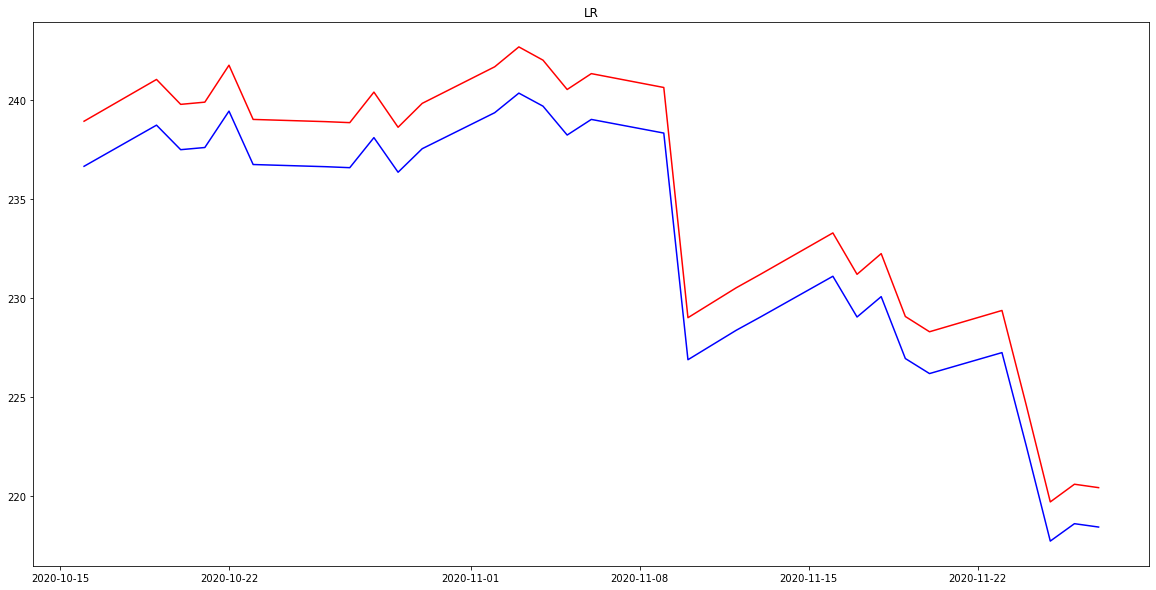

In [125]:
plt.figure(figsize=(20,10))
plt.plot(df_test.index, df_test['price'], 'b')
plt.plot(df_test.index, df_test['Prediction_LR'], 'r')
plt.title("LR")

0.4666666666666667